<a href="https://colab.research.google.com/github/JohanImbolBioDev/Manejo-de-datos-de-Excel-con-varias-hojas-en-R/blob/main/LaboratorioFisiolog%C3%ADaVegetalQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curvas QA

In [ ]:
library(googledrive)
library(googlesheets4)
library(readxl)

### Conectar Colab con google drive

In [ ]:
googledrive::drive_auth()

##Encontrar ID del archivo


In [ ]:
drive_find('LabDatos1CurvasAQ-ETR.xlsx')

## Descargar Archivo

In [65]:
file_id <- "1uKhr_mh3X94HKXFU4fjF6YudfOgZucZx"

drive_download(as_id(file_id), path = "data.xlsx", overwrite = TRUE)

File downloaded:

• LabDatos1CurvasAQ-ETR.xlsx <id: 1uKhr_mh3X94HKXFU4fjF6YudfOgZucZx>

Saved locally as:

• data.xlsx



## Importar todas las hojas en una variable

In [72]:
hojas <- excel_sheets('data.xlsx')

### Solo necesitamos los datos T y M

In [73]:
hojas

[1] "Dashboard"       "Datos completos" "T_Sol_BC1"       "T_Som_BC6"      
 [5] "T_Sol_G1"        "T_Sol_G6"        "M_Sol_BC3"       "M_Som_BC7"      
 [9] "M_Som_G6"        "M_Sol_G5"

### Por esta razon borraremos 'Dashboard' y 'Datos completos'

In [74]:
hojas <- setdiff(hojas, c('Dashboard','Datos completos'))

In [75]:
hojas

[1] "T_Sol_BC1" "T_Som_BC6" "T_Sol_G1"  "T_Sol_G6"  "M_Sol_BC3" "M_Som_BC7"
[7] "M_Som_G6"  "M_Sol_G5"

##Insertar todas las hojas en una lista y asignarle el nombre que tienen de hoja

In [76]:
lista_datos <- setNames(
  lapply(hojas, function(hoja) {
    read_excel("data.xlsx", sheet = hoja, skip = 2)
  }),
  hojas
)

# Cambio de nombre de los encabezados
lista_datos <- lapply(lista_datos, function(hoja) {
  colnames(hoja) <- c("LeafQ", "GasEx_A", "FLR_ETR", "Limite")
  return(hoja)
})

New names:
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...1`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...2`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...3`
New names:
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...1`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...2`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...3`
New names:
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...1`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...2`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...3`
New names:
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...1`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...2`
• `µmol m⁻² s⁻¹` -> `µmol m⁻² s⁻¹...3`
New names:
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...1`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...2`
New names:
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...1`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...2`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...3`
New names:
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...1`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...2`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...3`
New names:
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...1`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...2`
• `µmolm⁻²s⁻¹` -> `µmolm⁻²s⁻¹...3`


### A partir de este momento, ya podemos manejar los datos como dataframe

In [77]:
lista_datos$T_Sol_BC1

LeafQ,GasEx_A,FLR_ETR,Limite
<chr>,<dbl>,<dbl>,<dbl>
100.015,0.1503007,0.000000,0
99.9638,3.3832551,25.647229,0
199.807,4.2832841,42.755837,0
399.921,4.6614152,50.330551,0
400.0,5.6875630,56.998840,0
799.813,5.8771977,58.442225,0
1200.12,5.9620169,57.928446,0
1599.9,6.1021589,57.158669,1
1800.25,6.2508254,56.448757,1


## Limpiar datos

In [78]:
library(dplyr)

#### Si una fila tiene un valor que sea de letras, se eliminará. Adicionalmente, no aseguramos de que cada columna sea numérica y redondeamos LeafQ

In [79]:
lista_datos <- lapply(lista_datos, function(hoja){
  hoja[!apply(hoja, 1, function(fila) any(grepl("[a-zA-Z]", fila))), ]
})

lista_datos <- lapply(lista_datos, function(hoja){
  hoja$LeafQ <- as.numeric(as.character(hoja$LeafQ))
  hoja$LeafQ <- round(hoja$LeafQ, 0)
  return(hoja)
})

Para obtener un mayor orden, separamos los datos en las plantas G y BC

In [80]:
Datos_G <- lista_datos[grepl('G', names(lista_datos))] #Extraemos solo los valores que contengan una G en su nombre

In [81]:
names(Datos_G)

[1] "T_Sol_G1" "T_Sol_G6" "M_Som_G6" "M_Sol_G5"

In [82]:
Datos_BC <- lista_datos[grepl('BC', names(lista_datos))]

In [83]:
names(Datos_BC)

[1] "T_Sol_BC1" "T_Som_BC6" "M_Sol_BC3" "M_Som_BC7"

In [84]:
Datos_BC$M_Sol_BC3

LeafQ,GasEx_A,FLR_ETR,Limite
<dbl>,<dbl>,<dbl>,<dbl>
200,3.0205428,38.306731,0
400,3.3661223,41.219993,0
400,4.1049666,44.375702,0
400,4.4056314,45.781103,0
800,4.6430268,45.681199,1
1200,4.7217429,45.049489,1
1600,4.6704412,44.430053,1
1800,4.6698675,43.797041,1
1400,4.5222433,44.982579,1


#Realizamos la grafica con una sola repetición

In [85]:
library(ggplot2)

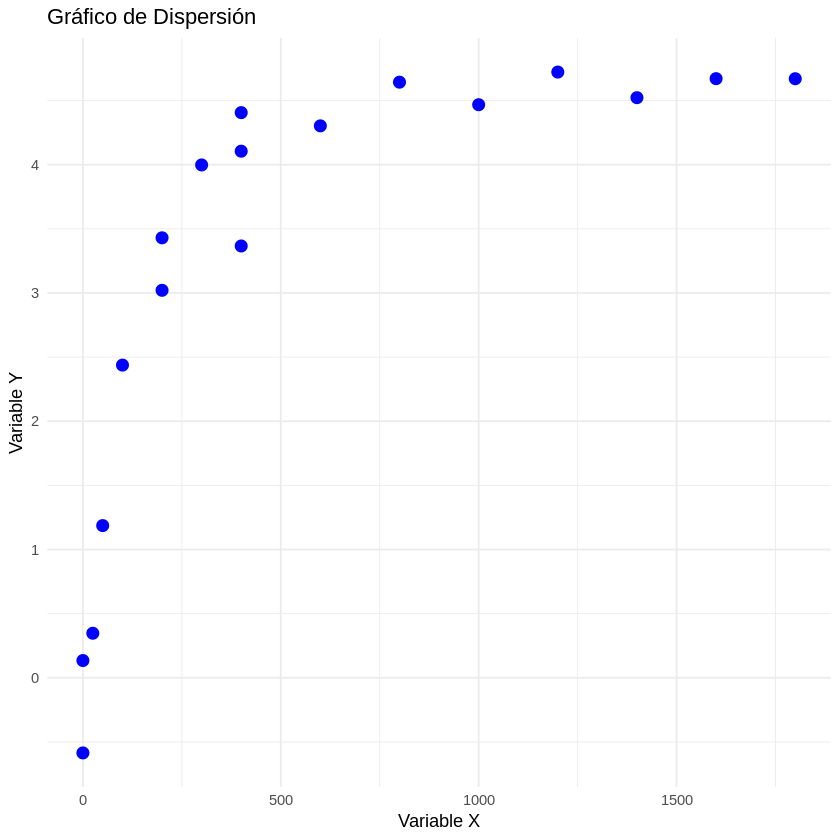

In [86]:
ggplot(lista_datos$M_Sol_BC3, aes(x = LeafQ, y = GasEx_A))+geom_point(color="blue", size=3) +
  labs(title="Gráfico de Dispersión", x="Variable X", y="Variable Y") +
  theme_minimal()

##Realización de grafica con todas las plantas BC

### Para esto juntamos todos los datos en un solo dataframe

In [92]:
Datos_BC_Combinados <- bind_rows(Datos_BC, .id = 'fuente')

In [93]:
Datos_BC_Combinados

fuente,LeafQ,GasEx_A,FLR_ETR,Limite
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
T_Sol_BC1,100,0.15030066,0.000000,0
T_Sol_BC1,100,3.38325509,25.647229,0
T_Sol_BC1,200,4.28328414,42.755837,0
T_Sol_BC1,400,4.66141522,50.330551,0
T_Sol_BC1,400,5.68756305,56.998840,0
T_Sol_BC1,800,5.87719768,58.442225,0
T_Sol_BC1,1200,5.96201688,57.928446,0
T_Sol_BC1,1600,6.10215891,57.158669,1
T_Sol_BC1,1800,6.25082544,56.448757,1


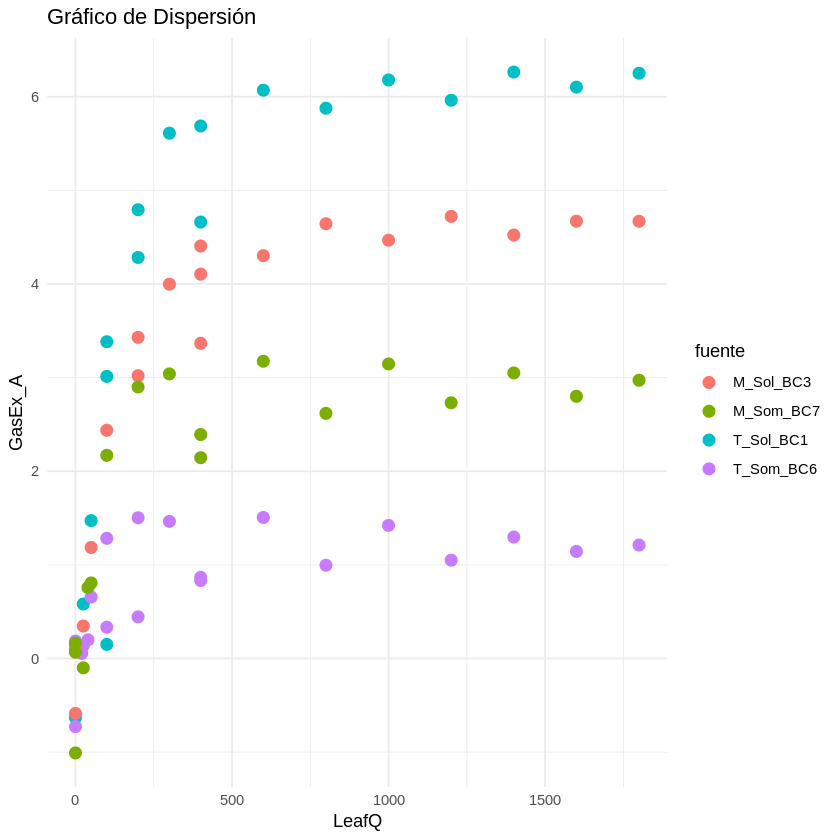

In [104]:
ggplot()+
  geom_point(data = Datos_BC_Combinados, aes(x = LeafQ, y = GasEx_A, color = fuente), size=3) +
  labs(title="Gráfico de Dispersión", x="LeafQ", y="GasEx_A") +
  theme_minimal()

Para calcular la asimiliación maxima (Asat) solo debemos usar los datos que tengan un valor de 1 en la columna limite

In [110]:
library(dplyr)
library(tidyr)
library(purrr)

Filtramos los datos que sean limite 1 y calculamos la regresión lineal por cada fuente (planta)

In [120]:
Datos_BC_Combinados_lim1 <- Datos_BC_Combinados %>% filter(Limite == 1)

Asat <- Datos_BC_Combinados_lim1 %>%
  group_by(fuente) %>%
  summarise(
    intercepto = coef(lm(GasEx_A ~ LeafQ, data = pick(LeafQ, GasEx_A)))[1],
    pendiente = coef(lm(GasEx_A ~ LeafQ, data = pick(LeafQ, GasEx_A)))[2]
  )

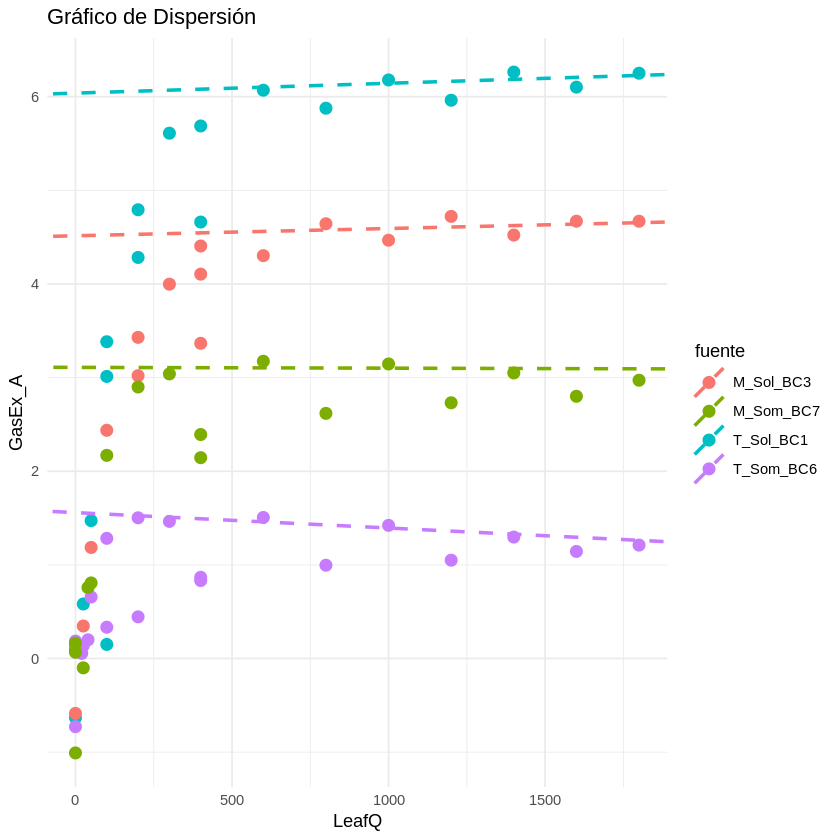

In [121]:
ggplot()+
  geom_point(data = Datos_BC_Combinados, aes(x = LeafQ, y = GasEx_A, color = fuente), size=3) +
  geom_abline(data = Asat, aes(intercept = intercepto, slope = pendiente, color = fuente),
              linetype = "dashed", size = 1) +
  labs(title="Gráfico de Dispersión", x="LeafQ", y="GasEx_A") +
  theme_minimal()

Para calcular la data de respiración (Asat) solo debemos usar los datos que tengan un valor de 1 en la columna limite

In [122]:
Datos_BC_Combinados_lim0 <- Datos_BC_Combinados %>% filter(Limite == 0)

R <- Datos_BC_Combinados_lim0 %>%
  group_by(fuente) %>%
  summarise(
    intercepto = coef(lm(GasEx_A ~ LeafQ, data = pick(LeafQ, GasEx_A)))[1],
    pendiente = coef(lm(GasEx_A ~ LeafQ, data = pick(LeafQ, GasEx_A)))[2]
  )

In [123]:
Asat

fuente,intercepto,pendiente
<chr>,<dbl>,<dbl>
M_Sol_BC3,4.514762,7.770619e-05
M_Som_BC7,3.109309,-8.445841e-06
T_Sol_BC1,6.038370,1.050570e-04
T_Som_BC6,1.558189,-1.645498e-04


In [124]:
R

fuente,intercepto,pendiente
<chr>,<dbl>,<dbl>
M_Sol_BC3,0.7297324,0.0079964148
M_Som_BC7,0.8145563,0.0015135603
T_Sol_BC1,1.8001648,0.0050943272
T_Som_BC6,0.3958490,0.0005537313


NULL

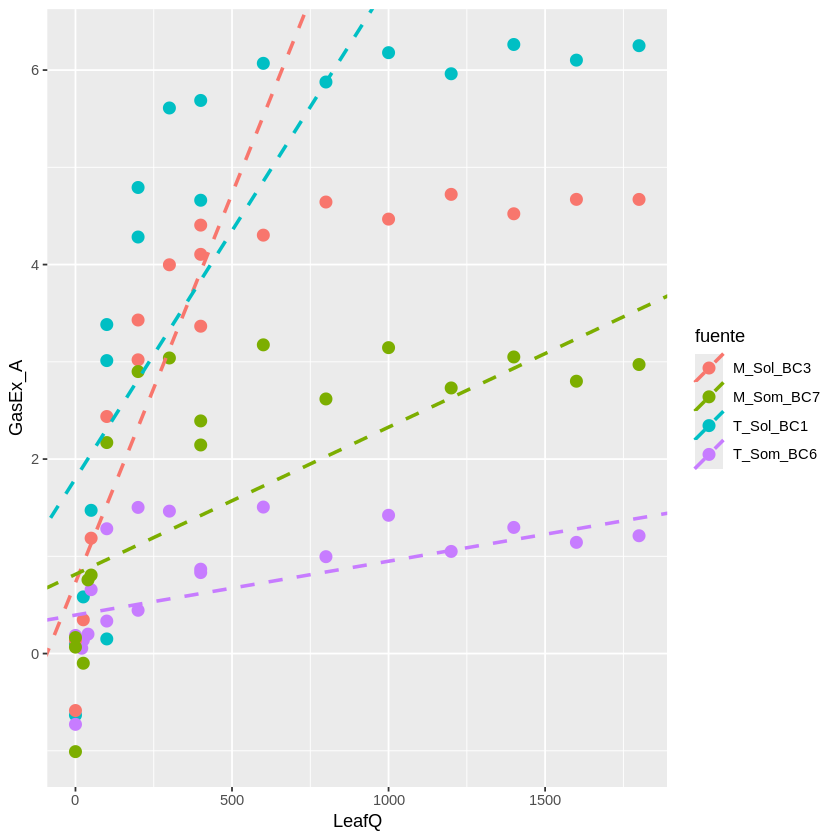

In [126]:
ggplot()+
  geom_point(data = Datos_BC_Combinados, aes(x = LeafQ, y = GasEx_A, color = fuente), size=3) +

  geom_abline(data = R, aes(intercept = intercepto, slope = pendiente, color = fuente),
              linetype = "dashed", size = 1)

  labs(title="Gráfico de Dispersión", x="LeafQ", y="GasEx_A") +
  theme_minimal()